In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	3
float64		column 2	9
float64		column 3	9
float64		column 4	6
int64		column 5	0
float64		column 6	6
float64		column 7	6
float64		column 8	9
float64		column 9	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,680.000000,674.000000,674.000000,677.00000,683.000000,677.000000,677.000000,674.000000,677.000000
mean,4.454412,3.117211,3.212166,2.83161,3.234261,3.519941,3.406204,2.850148,1.605613
std,2.820759,3.036122,2.977544,2.86656,2.223085,3.630692,2.410313,3.044461,1.738742
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.00000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.00000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.00000,4.000000,6.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

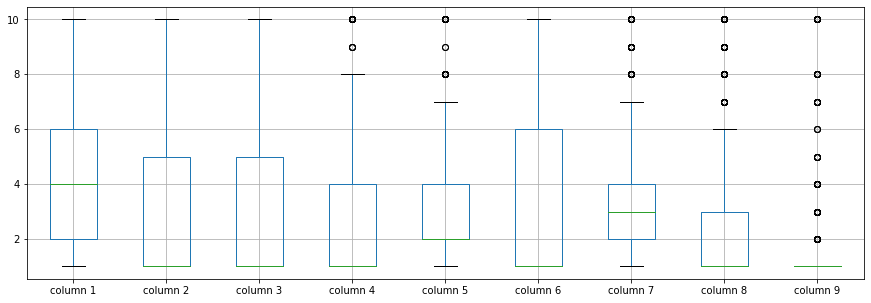

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.454412
column 2    3.117211
column 3    3.212166
column 4    2.831610
column 5    3.234261
column 6    3.519941
column 7    3.406204
column 8    2.850148
column 9    1.605613
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.643492,0.656071,0.488229,0.523766,0.596136,0.562205,0.529520,0.349123
column 2,0.643492,1.000000,0.909594,0.705032,0.754225,0.690301,0.747421,0.719434,0.466286
column 3,0.656071,0.909594,1.000000,0.683646,0.721078,0.713842,0.724415,0.711021,0.442771
column 4,0.488229,0.705032,0.683646,1.000000,0.594304,0.671567,0.661727,0.596705,0.418323
column 5,0.523766,0.754225,0.721078,0.594304,1.000000,0.584093,0.615306,0.624892,0.482194
column 6,0.596136,0.690301,0.713842,0.671567,0.584093,1.000000,0.687202,0.595628,0.343290
column 7,0.562205,0.747421,0.724415,0.661727,0.615306,0.687202,1.000000,0.653322,0.343774
column 8,0.529520,0.719434,0.711021,0.596705,0.624892,0.595628,0.653322,1.000000,0.432743
column 9,0.349123,0.466286,0.442771,0.418323,0.482194,0.343290,0.343774,0.432743,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+6,9+6+6,9+6+6,9+6+6+6+6,9+6+6+6+6+6,9+6+6+6+6+6+6,9+6+6+6+6+6,9+6+6+6+6,9+6+6+6,9+6+6,9+6,9], vae_layer = False, seed = 60)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.36174792335147
Epoch: 1 , loss: 36.09269691648937
Epoch: 2 , loss: 36.59783653985886
Epoch: 3 , loss: 36.230883280436196
Epoch: 4 , loss: 36.41591589791434
Epoch: 5 , loss: 35.88229824247814
Epoch: 6 , loss: 36.099747748602006
Epoch: 7 , loss: 36.14977028256371
Epoch: 8 , loss: 35.83076567876907
Epoch: 9 , loss: 35.24149817512149
Epoch: 10 , loss: 34.71569624401274
Epoch: 11 , loss: 32.48756168002174
Epoch: 12 , loss: 30.76649570465088
Epoch: 13 , loss: 29.811713491167342
Epoch: 14 , loss: 29.55866239184425
Epoch: 15 , loss: 29.41704800015404
Epoch: 16 , loss: 29.932648091089156
Epoch: 17 , loss: 29.421455769311812
Epoch: 18 , loss: 29.238420032319567
Epoch: 19 , loss: 29.791604904901412
Epoch: 20 , loss: 29.422344616481237
Epoch: 21 , loss: 29.918749763852073
Epoch: 22 , loss: 29.273534661247616
Epoch: 23 , loss: 29.342395419166202
Epoch: 24 , loss: 29.43724455152239
Epoch: 25 , loss: 29.63283656892

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
680,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(41.89520699408634, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.12493791847396617

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,1.0


In [20]:
imputations[-1].to_excel("BCW_NW_1(imp).xlsx", index=False, header=False)